In [1]:
# !pip install -q --upgrade matplotlib seaborn

In [2]:
import numpy as np, pandas as pd
import matplotlib, seaborn as sns

for lib in (matplotlib, sns):
    print(lib.__name__, lib.__version__)

matplotlib 3.8.0
seaborn 0.12.2


In [3]:
ttn_global = pd.read_csv('titanic/train.csv')
ttn_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# matplotlib

Туториал https://matplotlib.org/stable/tutorials/

- fig, ax и pyplot интерфейсы
- `plt.subplots` и `plt.subplot_mosaic`.
  


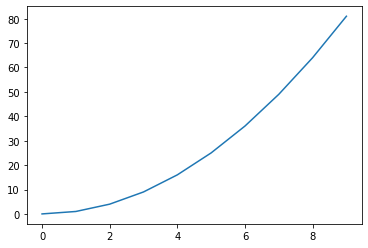

In [4]:
import matplotlib.pyplot as plt

plt.plot(np.arange(10) ** 2)
plt.show()

или

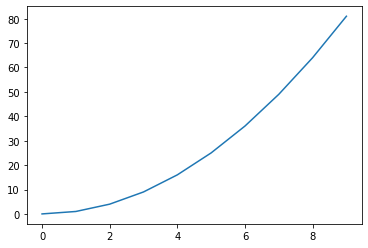

In [5]:
fig, ax = plt.subplots()
ax.plot(np.arange(10) ** 2)
plt.show()

`plt.subplots` и `plt.subplot_mosaic` - два основных способа создать "пустой мольберт" с фиксированной структурой

- `plt.subplots`

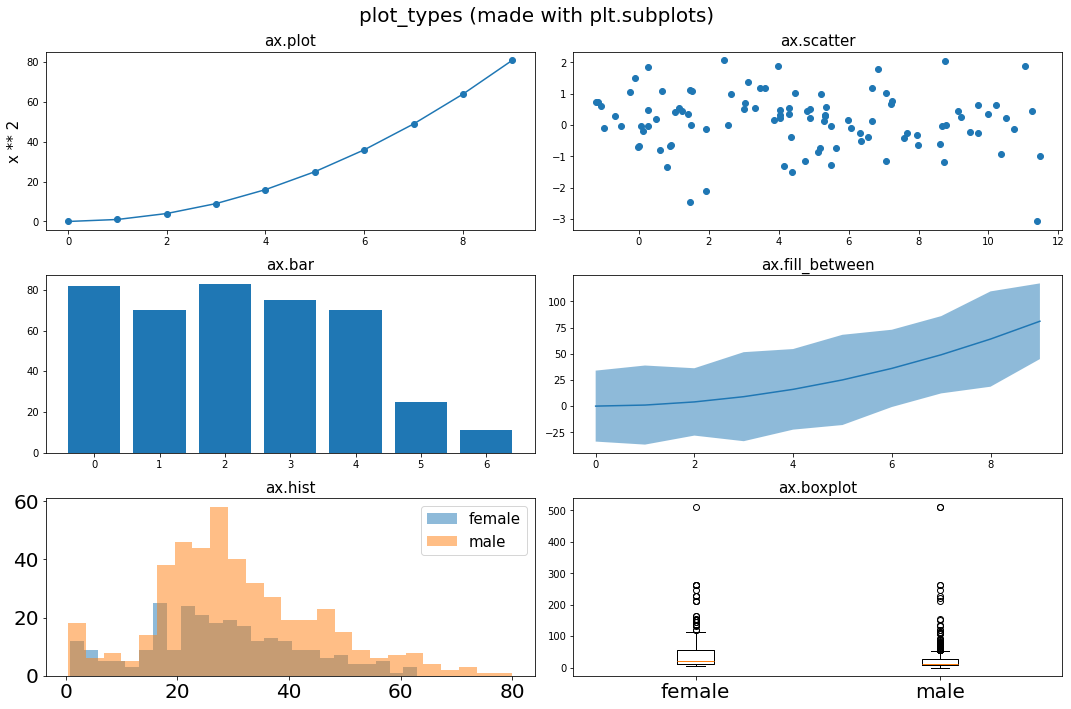

In [6]:
n = 100
array_for_lines = np.arange(10) ** 2
std_for_lines = np.random.randint(10, 40) + 3 * np.random.normal(size=10)
data_for_scatter = np.random.randint(low=0, high=11, size=n) + np.random.normal(size=n), np.random.normal(size=n)
data_for_bar = np.arange(7), np.random.randint(low=10, high=100, size=7)

fig, ax = plt.subplots(3, 2)
ax[0, 0].plot(array_for_lines, marker='o')
ax[0, 0].set_title('ax.plot', fontsize=15)
ax[0, 0].set_ylabel('x ** 2', fontsize=15)


ax[0, 1].scatter(*data_for_scatter)
ax[0, 1].set_title('ax.scatter', fontsize=15)

ax[1, 0].bar(*data_for_bar)
ax[1, 0].set_title('ax.bar', fontsize=15)

ax[1, 1].plot(array_for_lines)
ax[1, 1].fill_between(np.arange(10), y1=array_for_lines + std_for_lines, y2=array_for_lines - std_for_lines, alpha=0.5)
ax[1, 1].set_title('ax.fill_between', fontsize=15)

ax[2, 0].hist(ttn_global[ttn_global.Sex == 'female'].Age, bins=25, alpha=0.5, label='female')
ax[2, 0].hist(ttn_global[ttn_global.Sex == 'male'].Age, bins=25, alpha=0.5, label='male')
ax[2, 0].set_title('ax.hist', fontsize=15)
ax[2, 0].legend(fontsize=15)
ax[2, 0].tick_params(axis='both', labelsize=20)

data_for_boxplot = [ttn_global[ttn_global.Sex == 'female'].Fare.dropna(),
                    ttn_global[ttn_global.Sex == 'male'].Fare.dropna()]
ax[2, 1].boxplot(data_for_boxplot, labels=['female', 'male'])
ax[2, 1].set_title('ax.boxplot', fontsize=15)
ax[2, 1].tick_params(axis='x', labelsize=20)

fig.suptitle('plot_types (made with plt.subplots)', fontsize=20)
fig.set_size_inches(15, 10)
fig.tight_layout()

plt.show()

- `plt.subplot_mosaic`

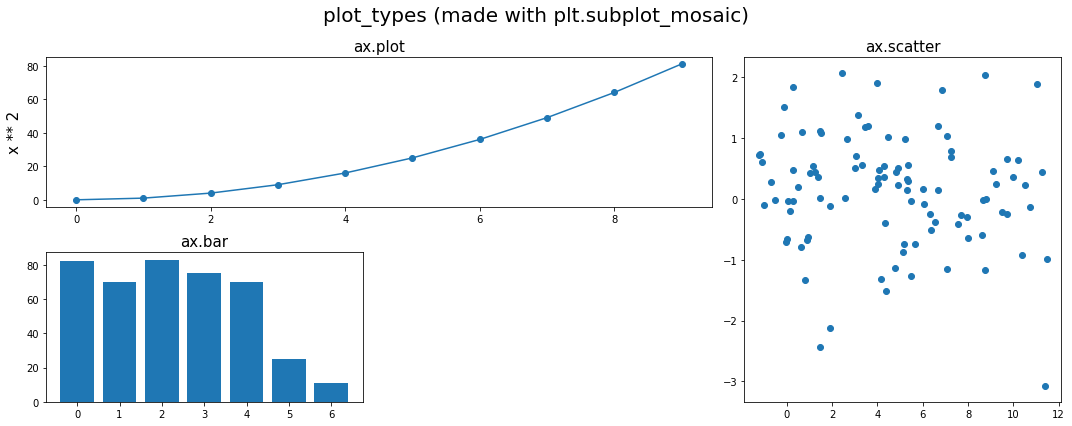

In [7]:
mosaic = '''
PPS
B.S
'''
fig, ax = plt.subplot_mosaic(mosaic=mosaic)

ax['P'].plot(array_for_lines, marker='o')
ax['P'].set_title('ax.plot', fontsize=15)
ax['P'].set_ylabel('x ** 2', fontsize=15)


ax['S'].scatter(*data_for_scatter)
ax['S'].set_title('ax.scatter', fontsize=15)

ax['B'].bar(*data_for_bar)
ax['B'].set_title('ax.bar', fontsize=15)

fig.suptitle('plot_types (made with plt.subplot_mosaic)', fontsize=20)
fig.set_size_inches(15, 6)
fig.tight_layout()

plt.show()

Пара слов о `pyplot`:

`pyplot` умеет рисовать только в "текущие" `fig`, `ax` (`plt.gcf()`, `plt.gca()` - get current figure, get current axes).
Переключать "текущие" `fig`, `ax` с одних на другие можно с помощью `plt.subplot` (не путать с `plt.subplots`!).

matplotlib также умеет выводить картинки, добавлять текстовые аннотации, строить 3d-графики...

## seaborn intro

Туториал https://seaborn.pydata.org/tutorial.html

  seaborn работает поверх matplotlib, дружит с pandas. Есть два интерфейса общения с библиотекой - отрисовка функциями и объектный интерфейс (добавили в сентябре 2022). Рассмотрим в рамках семинара функциональный интерфейс.

In [8]:
import warnings
warnings.filterwarnings('ignore')

- ### Relational plots

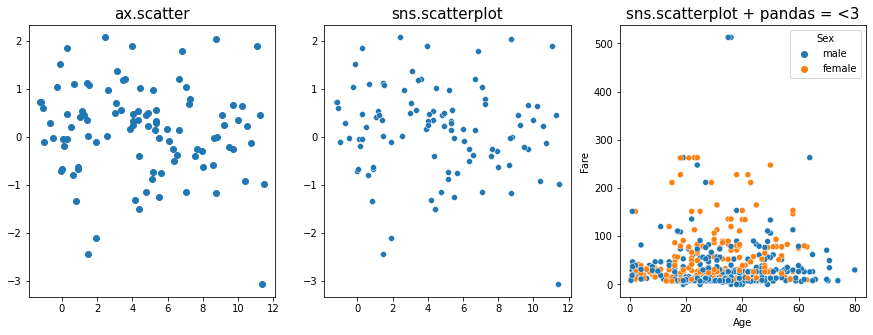

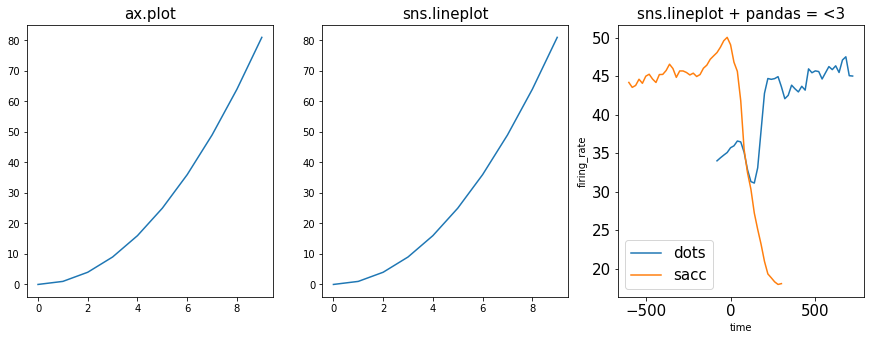

In [9]:
# scatterplot

fig, ax = plt.subplot_mosaic('abc')
ax['a'].scatter(*data_for_scatter)
ax['a'].set_title('ax.scatter', fontsize=15)

sns.scatterplot(x=data_for_scatter[0], y=data_for_scatter[1], ax=ax['b'])
ax['b'].set_title('sns.scatterplot', fontsize=15)

sns.scatterplot(data=ttn_global, x='Age', y='Fare', hue='Sex', ax=ax['c'])
ax['c'].set_title('sns.scatterplot + pandas = <3', fontsize=15)

fig.set_size_inches(15, 5)

plt.show()

# lineplot

fig, ax = plt.subplot_mosaic('abc')
ax['a'].plot(array_for_lines)
ax['a'].set_title('ax.plot', fontsize=15)

sns.lineplot(x=np.arange(10), y=array_for_lines, ax=ax['b'], n_boot=0, errorbar=None)
ax['b'].set_title('sns.lineplot', fontsize=15)

data_dots = sns.load_dataset('dots')
sns.lineplot(data=data_dots, x='time', y='firing_rate',
            hue='align', ax=ax['c'], n_boot=0, errorbar=None)
ax['c'].set_title('sns.lineplot + pandas = <3', fontsize=15)
ax['c'].tick_params(axis='both', labelsize=15)
ax['c'].legend(fontsize=15)

fig.set_size_inches(15, 5)

plt.show()

In [10]:
data_dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


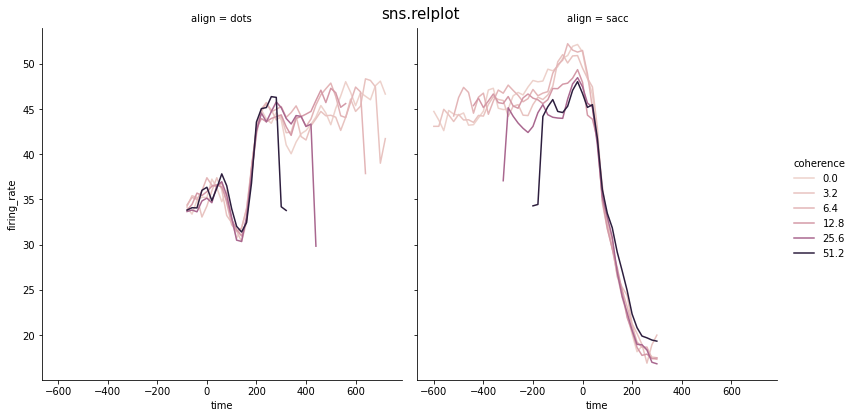

In [11]:
facetGrid = sns.relplot(data=data_dots, x='time', y='firing_rate',
            hue='coherence', errorbar=None,
           
           kind='line', col='align')

# cur_ax = facetGrid.axes[0, 0]
# cur_ax.set_title(cur_ax.get_title(), fontsize=15)
# cur_ax = facetGrid.axes[0, 1]
# cur_ax.set_title(cur_ax.get_title(), fontsize=15)

plt.gcf().suptitle('sns.relplot', fontsize=15)
plt.gcf().set_size_inches(12, 6)

- ### Distribution plots

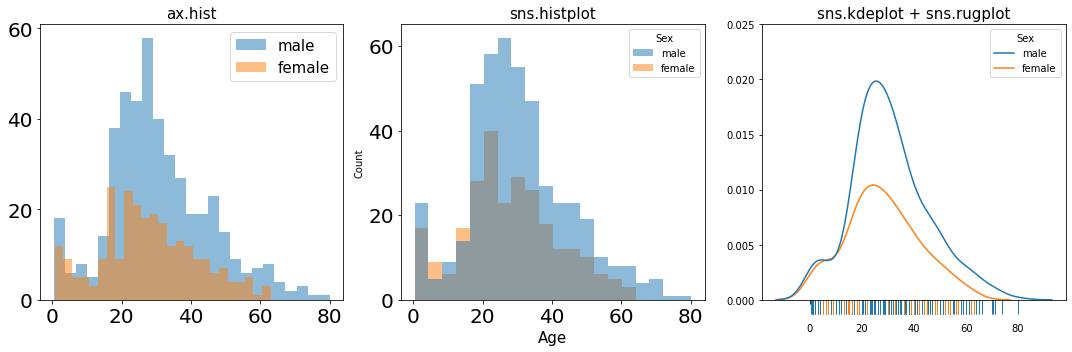

In [12]:
fig, ax = plt.subplot_mosaic('abc')
ax['a'].hist(ttn_global[ttn_global.Sex == 'male'].Age, bins=25, alpha=0.5, label='male')
ax['a'].hist(ttn_global[ttn_global.Sex == 'female'].Age, bins=25, alpha=0.5, label='female')
ax['a'].set_title('ax.hist', fontsize=15)
ax['a'].legend(fontsize=15)
ax['a'].tick_params(axis='both', labelsize=20)

sns.histplot(data=ttn_global, x='Age', hue='Sex', linewidth=0, alpha=0.5, ax=ax['b'])
ax['b'].set_title('sns.histplot', fontsize=15)
ax['b'].tick_params(axis='both', labelsize=20)
ax['b'].set_xlabel(ax['b'].get_xlabel(), fontsize=15)

sns.kdeplot(data=ttn_global, x='Age', hue='Sex', ax=ax['c'])
sns.rugplot(data=ttn_global, x='Age', hue='Sex', ax=ax['c'], height=-0.05, clip_on=False)
ax['c'].set_title('sns.kdeplot + sns.rugplot', fontsize=15)
ax['c'].tick_params(axis='x', pad=20)
ax['c'].set_xlabel('')
ax['c'].set_ylabel('')
ax['c'].set_ylim(0, 0.025)

fig.set_size_inches(15, 5)
fig.tight_layout()

plt.show()

- ### Categorical plots

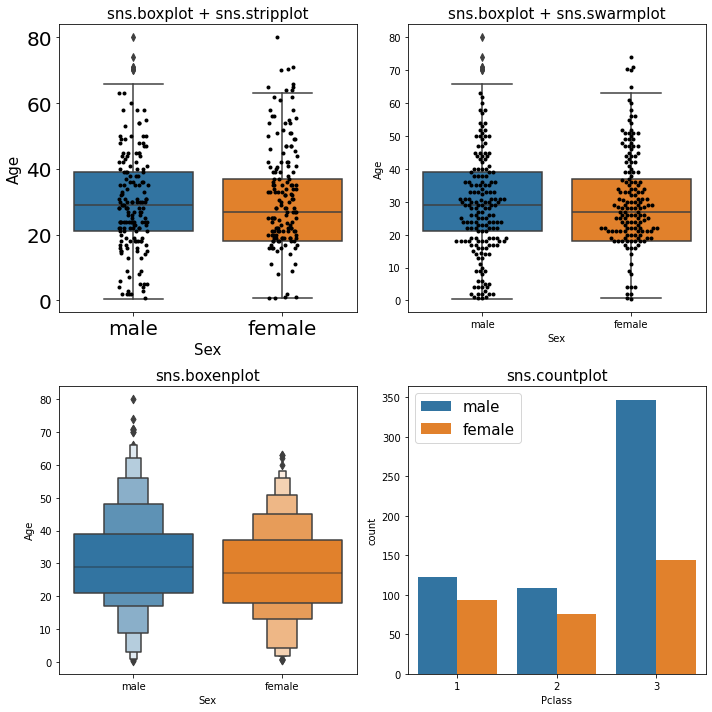

In [13]:
mosaic = '''
ab
cd
'''

fig, ax = plt.subplot_mosaic(mosaic)
sns.boxplot(data=ttn_global, y='Age', x='Sex', ax=ax['a'])
sns.stripplot(data=ttn_global.groupby('Sex').sample(200), y='Age', x='Sex', ax=ax['a'], color='black', size=4)
ax['a'].set_title('sns.boxplot + sns.stripplot', fontsize=15)
ax['a'].tick_params(axis='both', labelsize=20)
ax['a'].set_xlabel(ax['a'].get_xlabel(), fontsize=15)
ax['a'].set_ylabel(ax['a'].get_ylabel(), fontsize=15)

sns.boxplot(data=ttn_global, y='Age', x='Sex', ax=ax['b'])
sns.swarmplot(data=ttn_global.groupby('Sex').sample(200), y='Age', x='Sex', ax=ax['b'], color='black', size=4)
ax['b'].set_title('sns.boxplot + sns.swarmplot', fontsize=15)


sns.boxenplot(data=ttn_global, y='Age', x='Sex', ax=ax['c'])
ax['c'].set_title('sns.boxenplot', fontsize=15)

sns.countplot(data=ttn_global, x='Pclass', hue='Sex', ax=ax['d'])
ax['d'].set_title('sns.countplot', fontsize=15)
ax['d'].legend(fontsize=15)

fig.set_size_inches(10, 10)
fig.tight_layout()

plt.show()

### Время построения графиков в зависимости от размера выборки

In [14]:
from sklearn.datasets import make_blobs

df, _ = make_blobs(n_samples=int(3e6), n_features=2)
df = pd.DataFrame(df, columns=['feature_1', 'feature_2'])
df['time'] = np.arange(df.shape[0])
df['cat_feature'] = np.random.randint(0, 8, df.shape[0])
df['target'] = np.random.randint(0, 2, df.shape[0])

df.head()

,feature_1,feature_2,time,cat_feature,target
0,5.127806,8.755001,0,1,1
1,4.783756,6.592734,1,4,0
2,-11.525962,5.446074,2,4,0
3,4.754418,7.345958,3,5,1
4,-10.581146,5.120418,4,1,1


sns.histplot


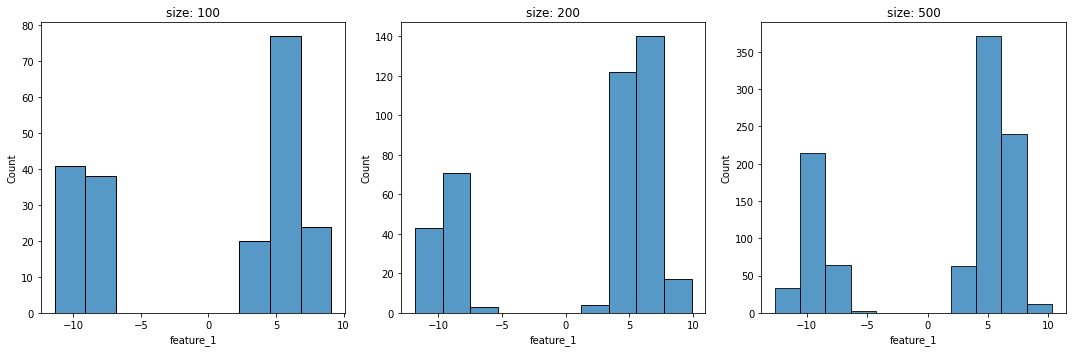

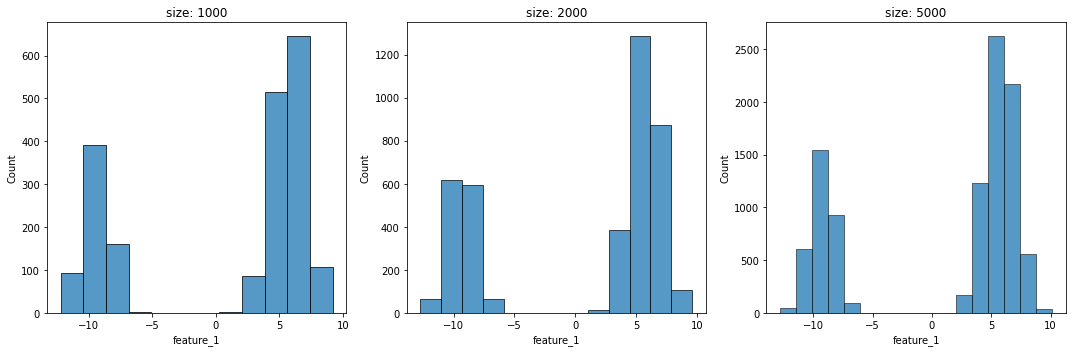

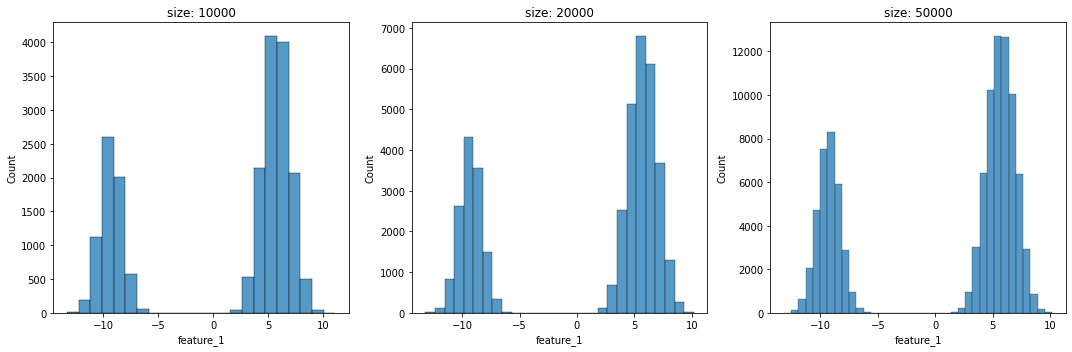

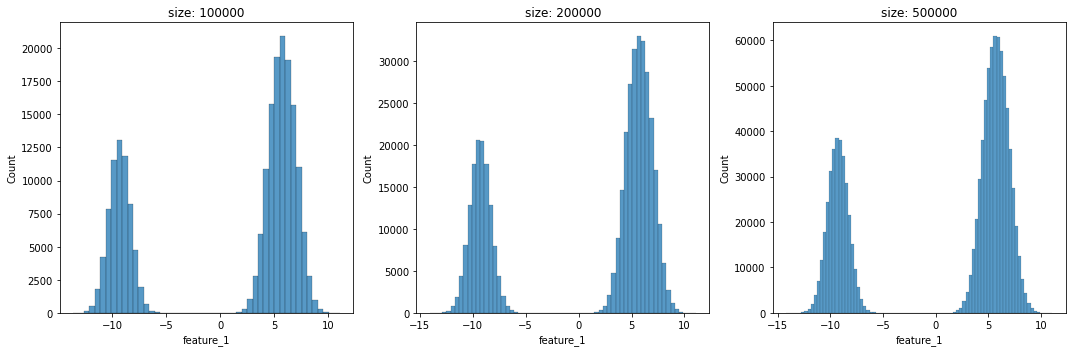

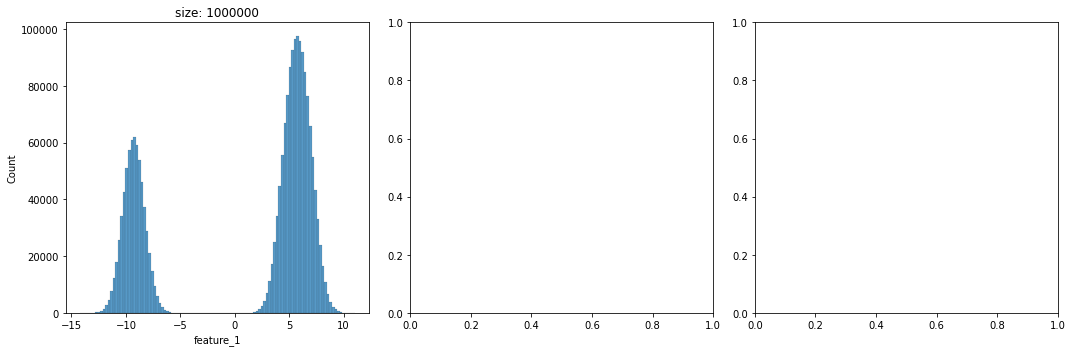

sns.histplot + kde


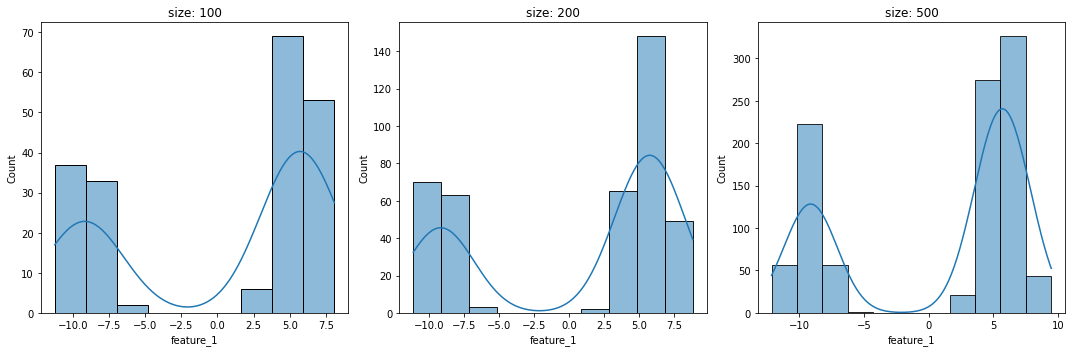

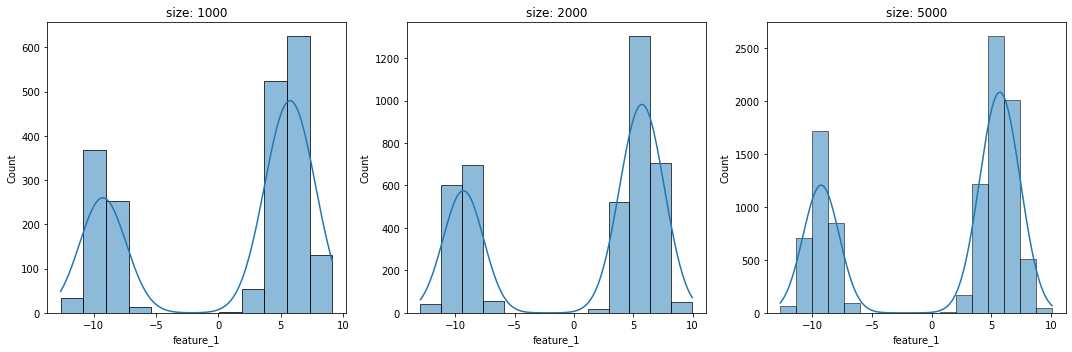

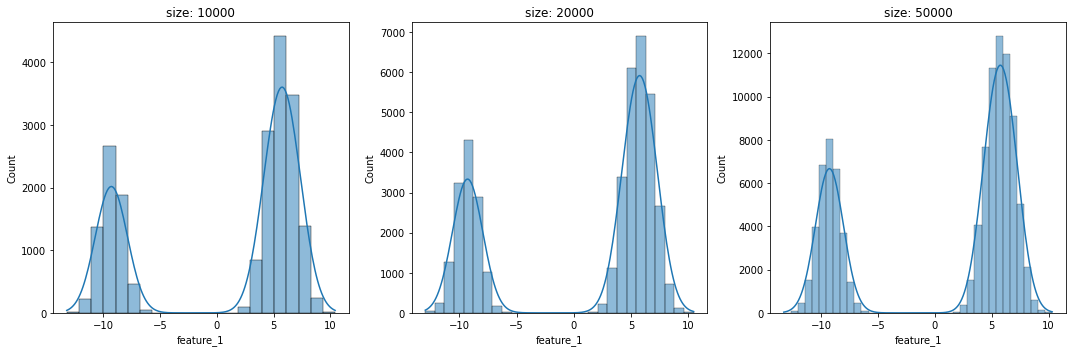

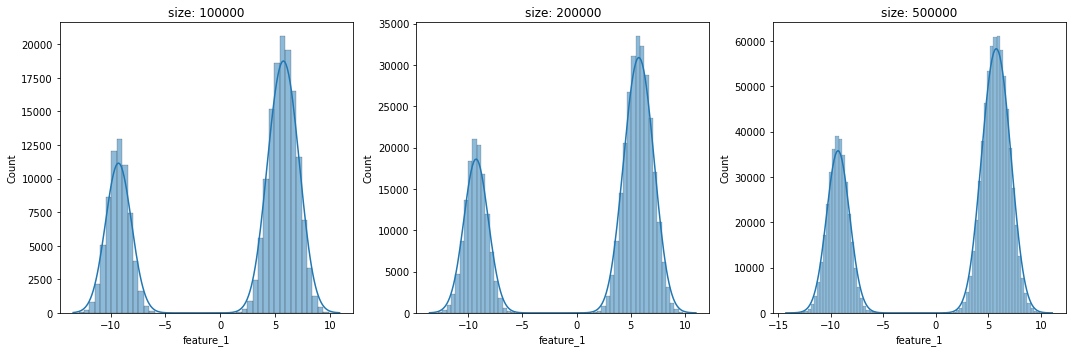

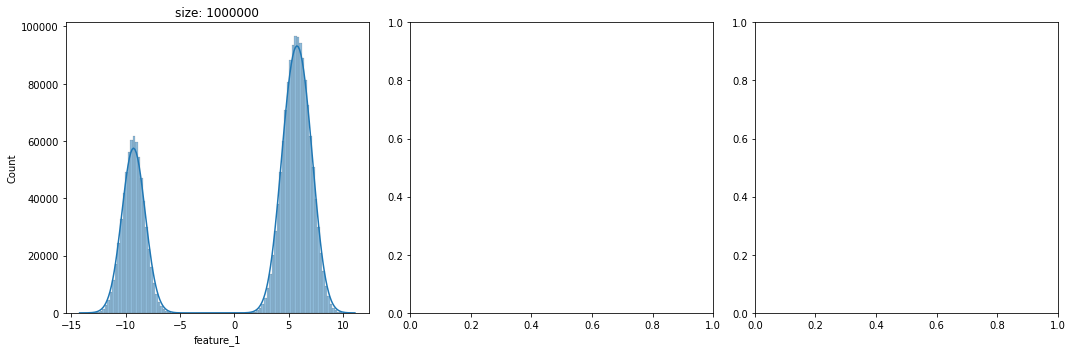

sns.kdeplot


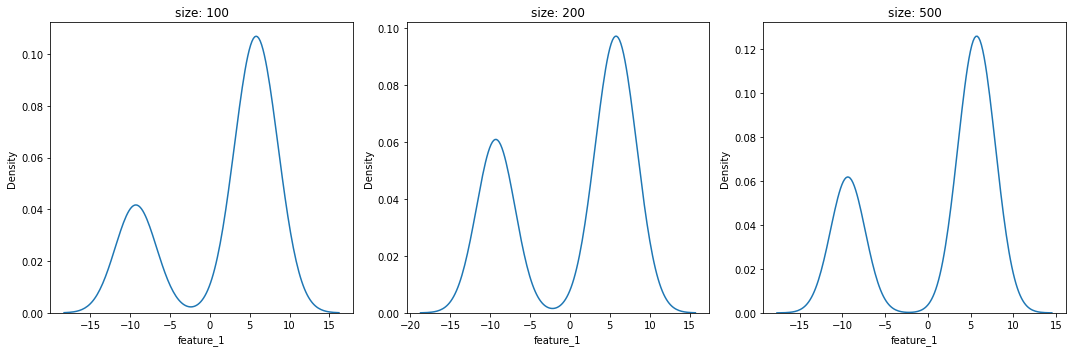

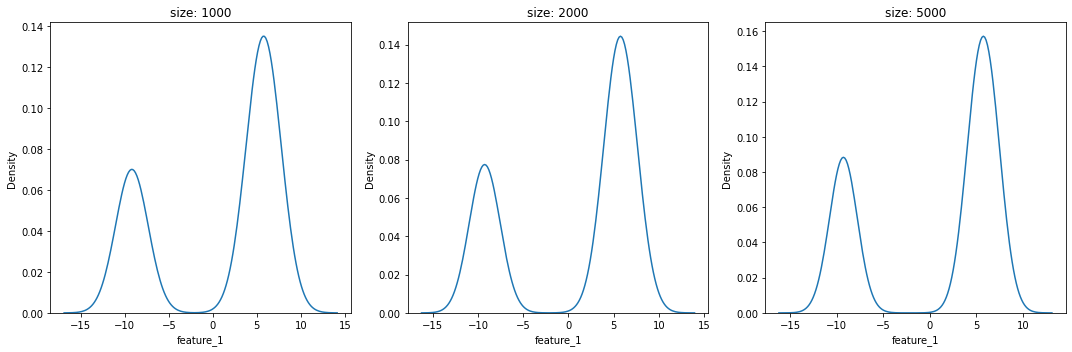

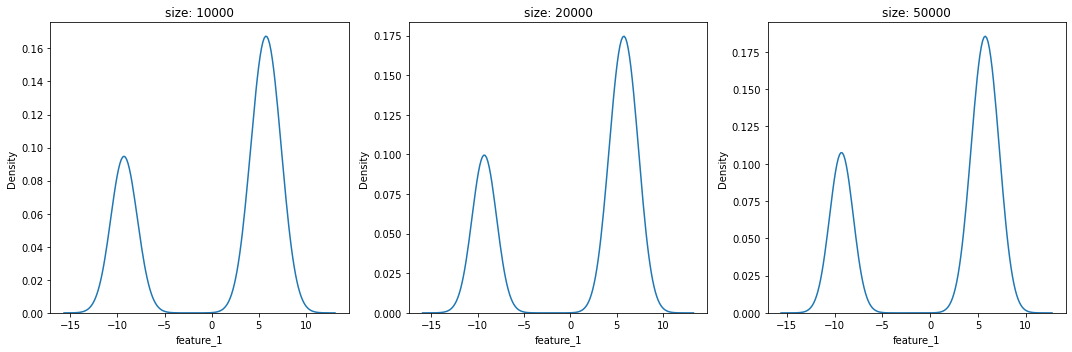

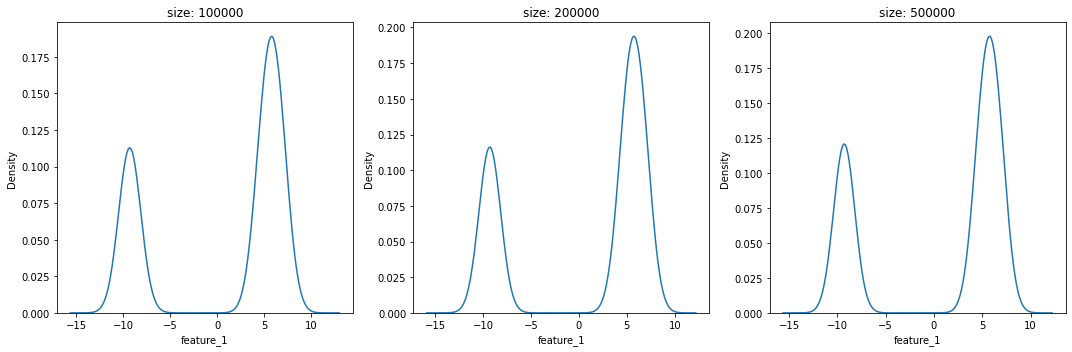

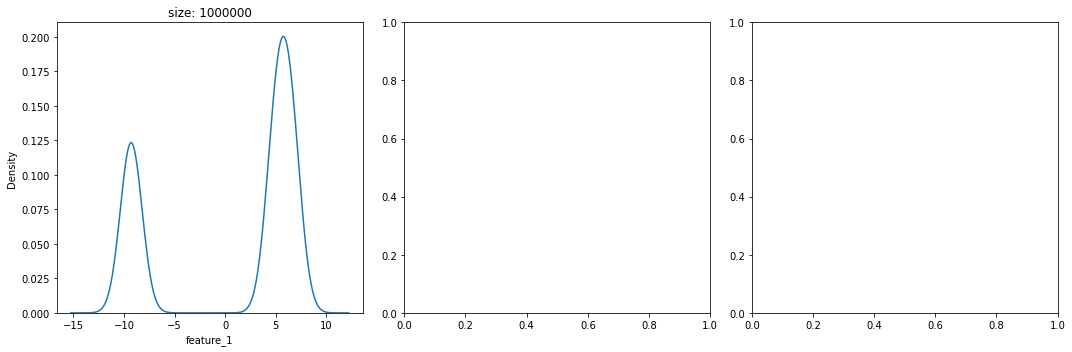

sns.rugplot


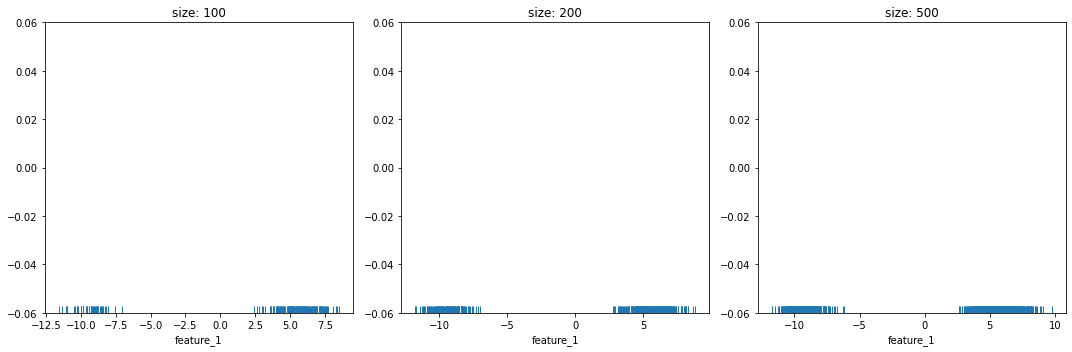

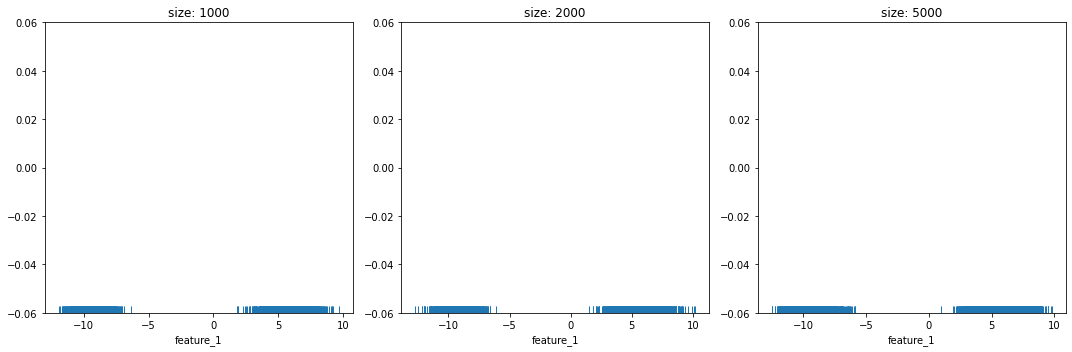

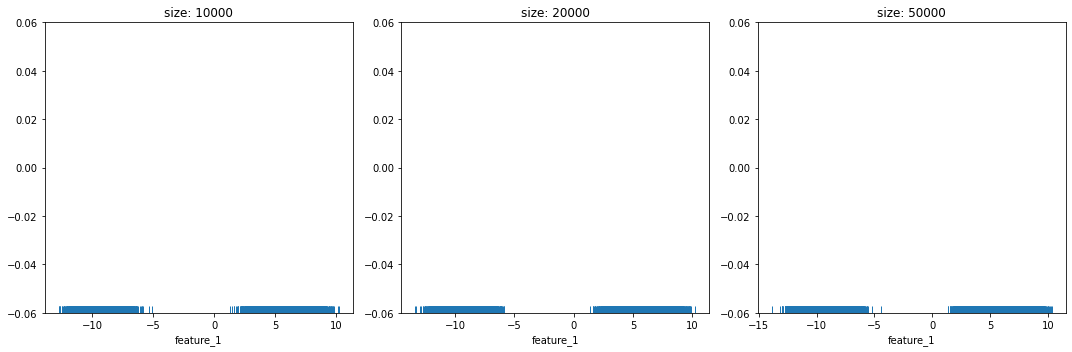

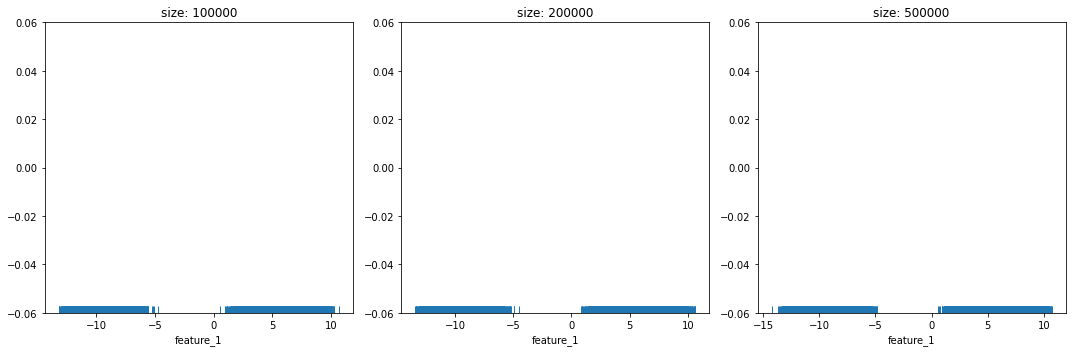

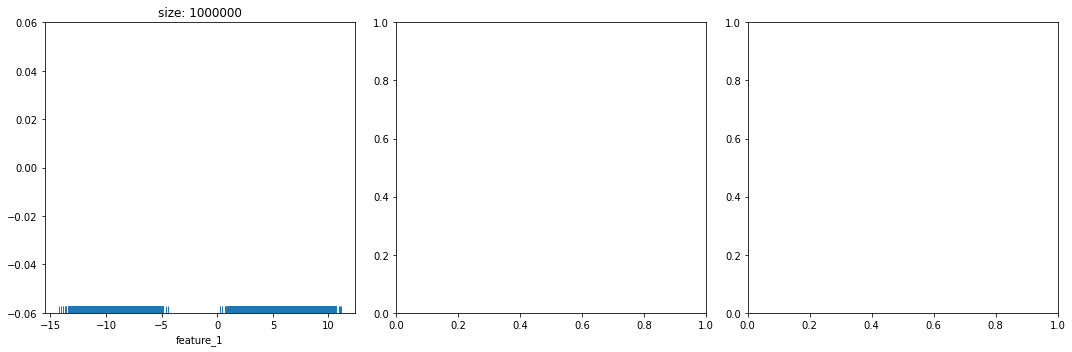

sns.swarmplot


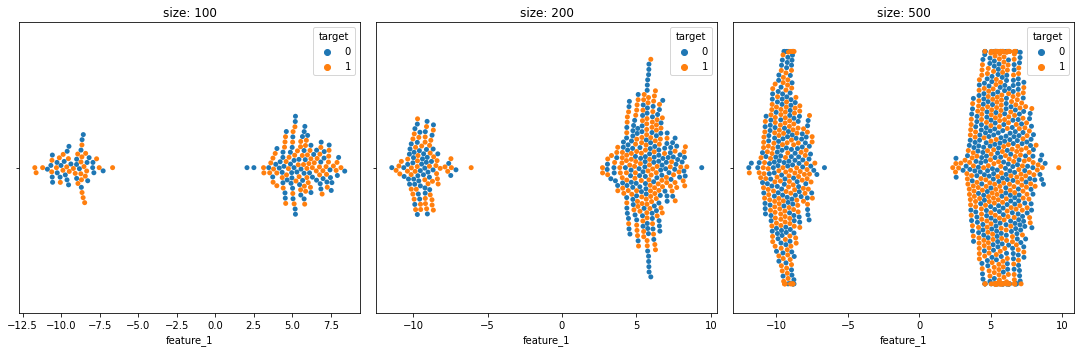

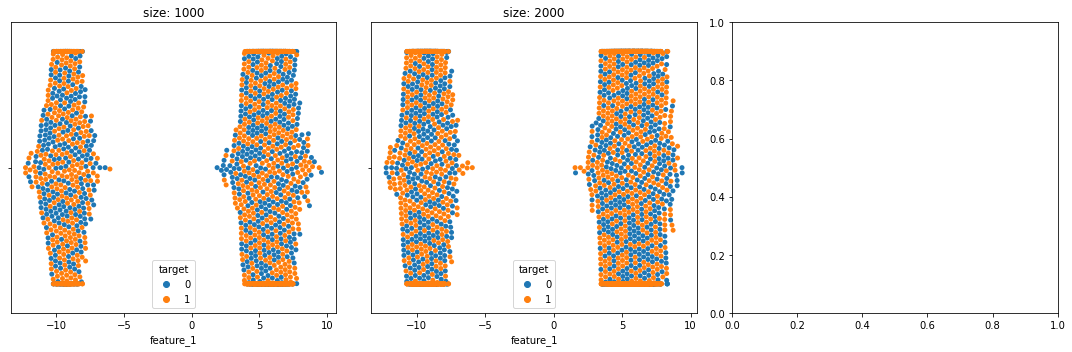

sns.stripplot


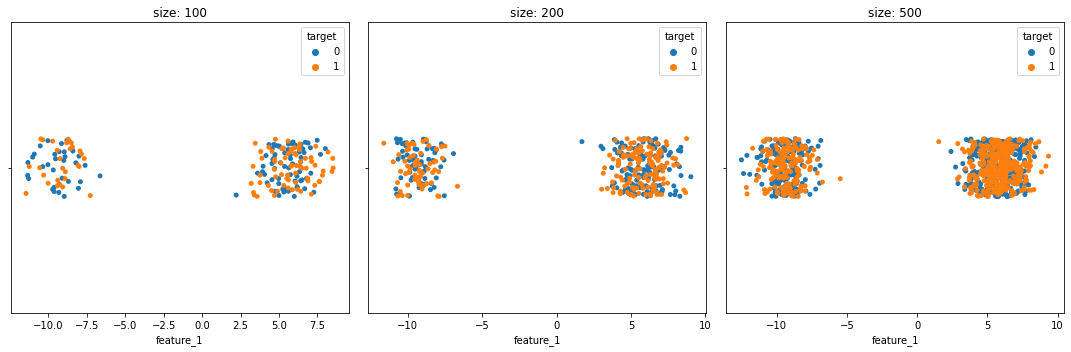

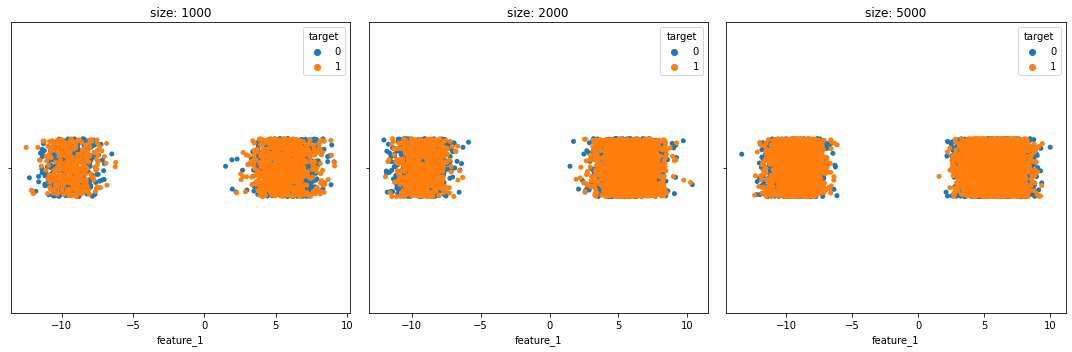

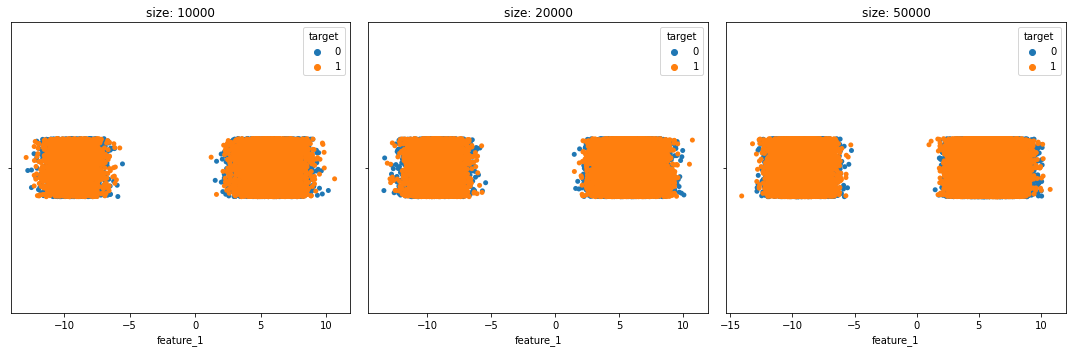

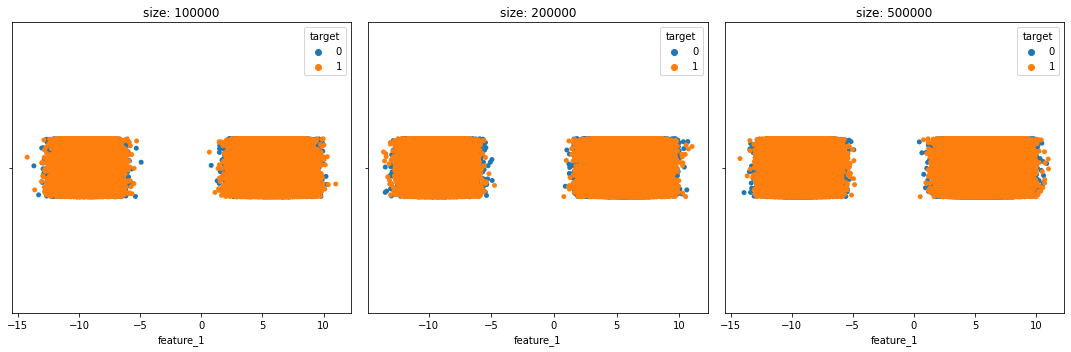

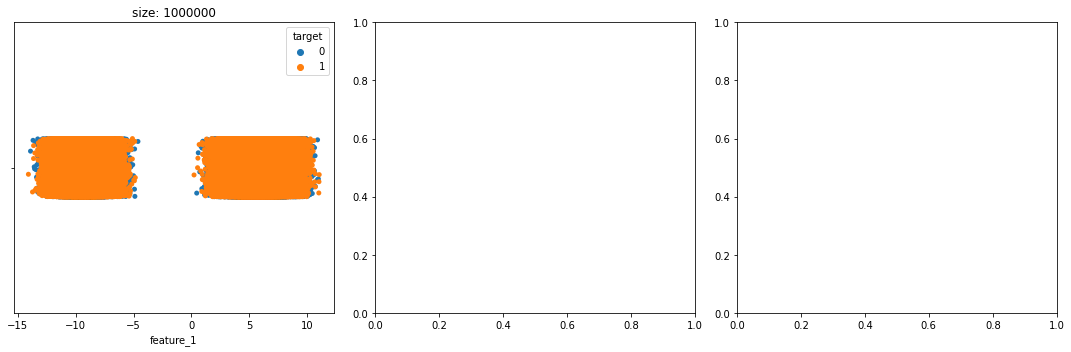

sns.boxplot


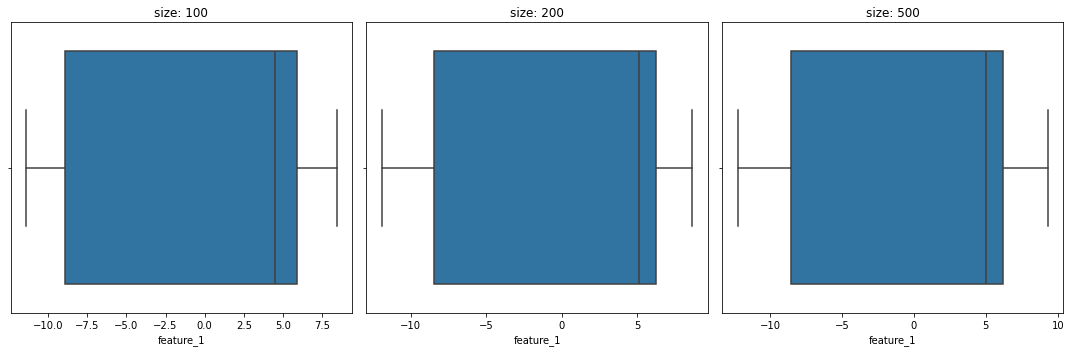

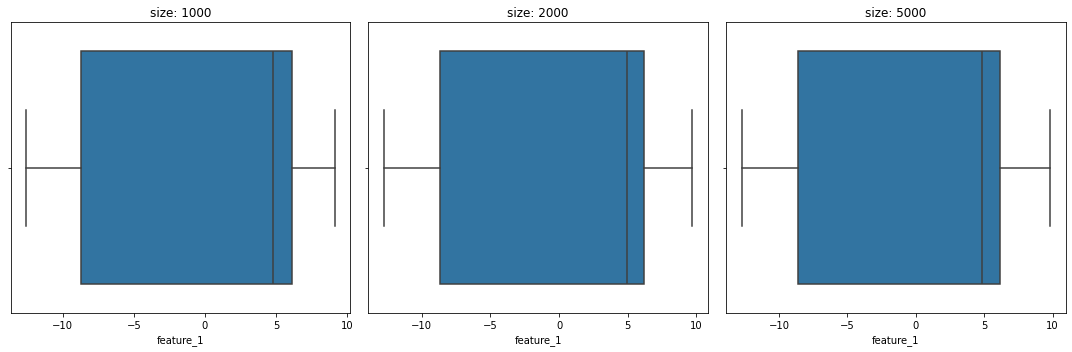

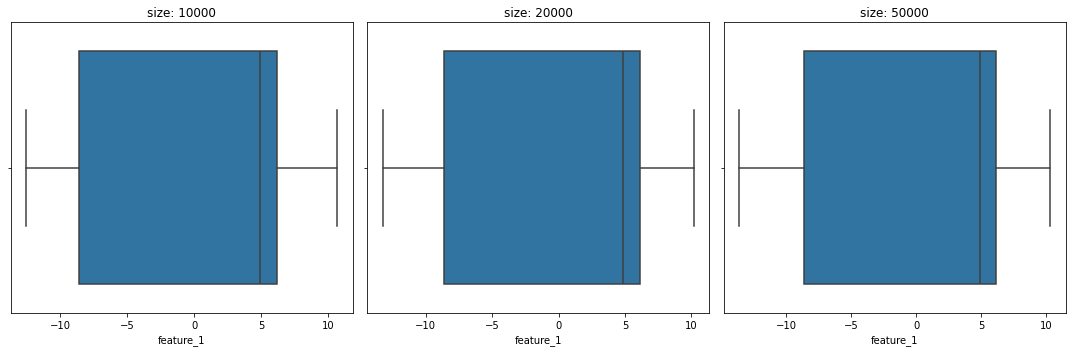

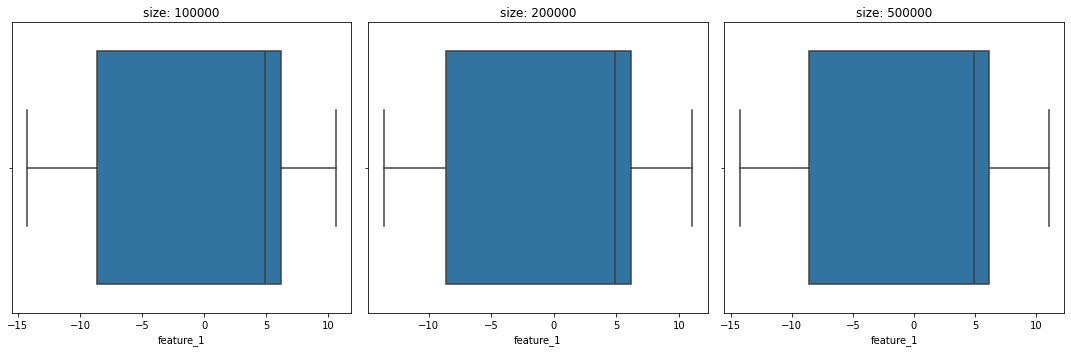

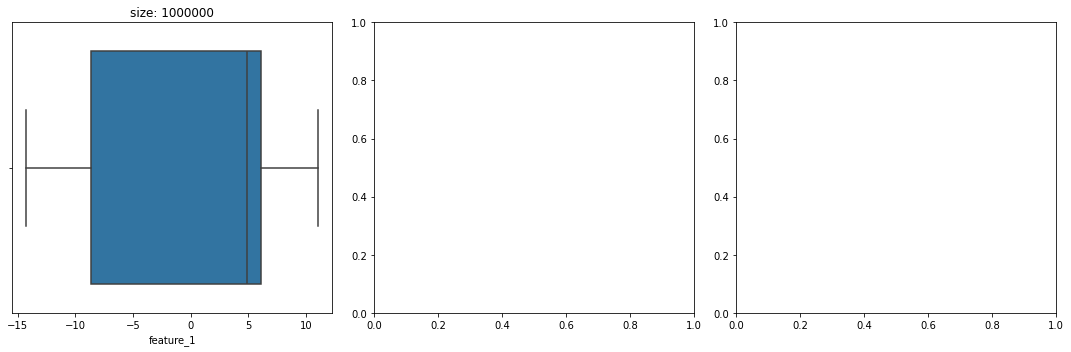

sns.boxenplot


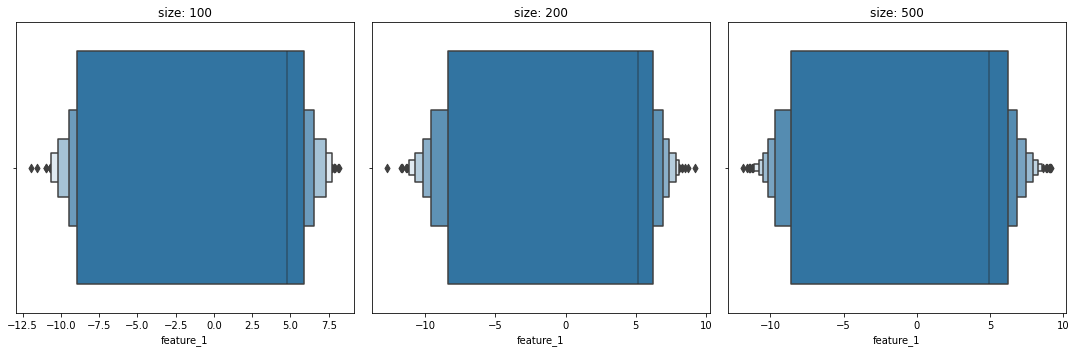

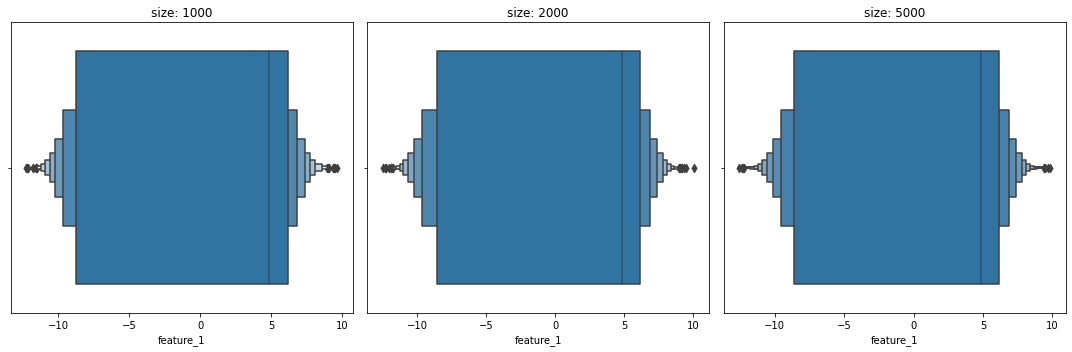

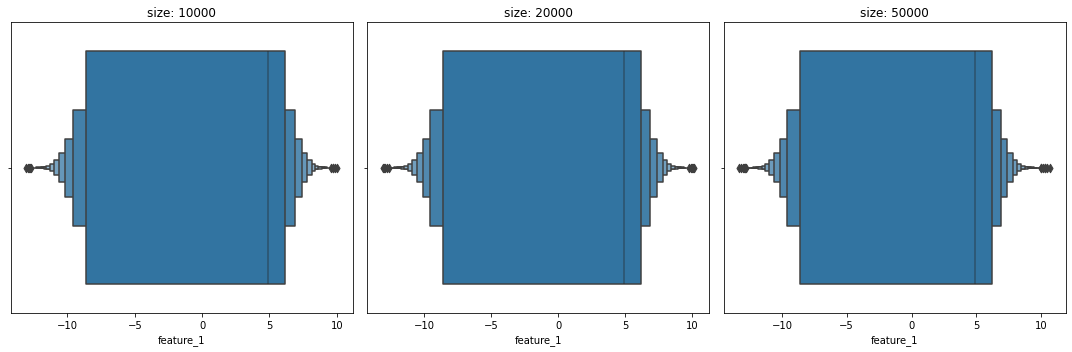

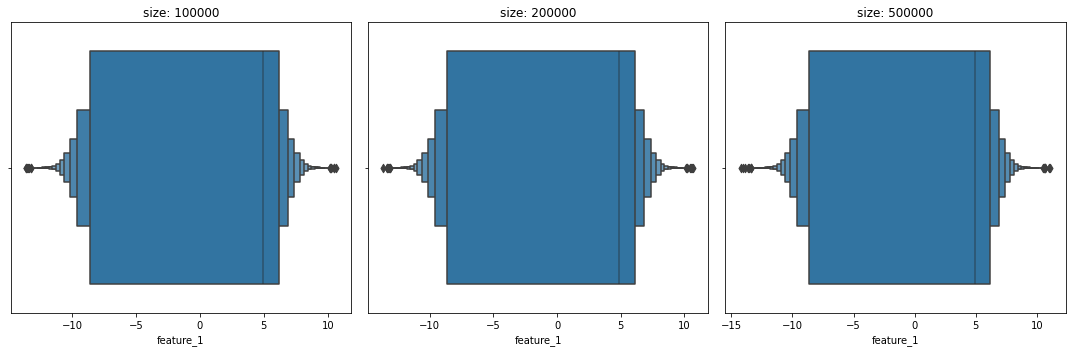

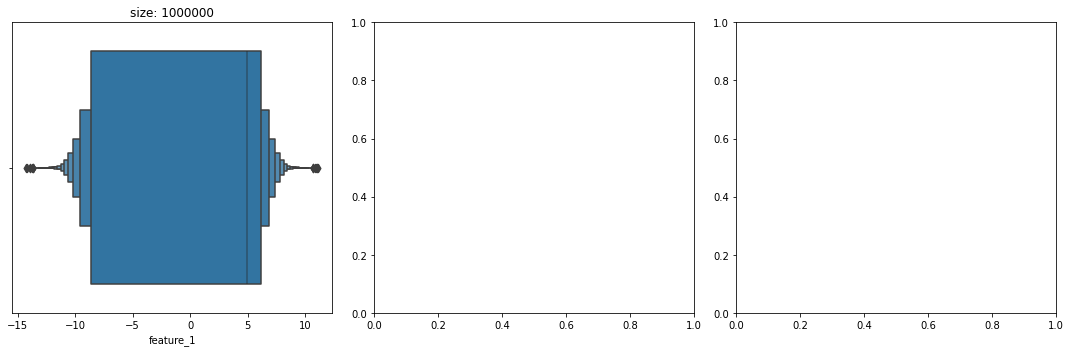

In [15]:
from functools import partial
from time import time as tm
from collections import defaultdict
import matplotlib.pyplot as plt

matplotlib.rcParams['agg.path.chunksize'] = 10000

import warnings
warnings.filterwarnings('ignore')

sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]
plot_list = [
             partial(sns.histplot, x='feature_1'),
             partial(sns.histplot, x='feature_1', kde=True),
             partial(sns.kdeplot, x='feature_1'),
             partial(sns.rugplot, x='feature_1'),
             partial(sns.swarmplot, x='feature_1', hue='target'),
             partial(sns.stripplot, x='feature_1', hue='target'),
             partial(sns.boxplot, x='feature_1', hue='target'),
             partial(sns.boxenplot, x='feature_1', hue='target')
]
plot_names = [
             'sns.histplot',
             'sns.histplot + kde',
             'sns.kdeplot',
             'sns.rugplot',
             'sns.swarmplot',
             'sns.stripplot',
             'sns.boxplot',
             'sns.boxenplot',
]
plots = zip(plot_names, plot_list)
grp = df.groupby('target')

res = defaultdict(list)
std = defaultdict(list)
limits = defaultdict(lambda:100)
limits['sns.swarmplot'] = 5

for name, plot in plots:
    print(name)
    fig, ax = plt.subplots(1, 3)
    for ax_num, size in enumerate(sizes[:limits[name]]):
        data = grp.sample(size)
        plt.subplot(1, 3, ax_num % 3 + 1)
        plt.gca().set_title(f'size: {size}')
        actual_time = %timeit -n1 -r1 -o -q plot(data=data)
        if ax_num % 3 == 2:
            fig.set_size_inches(15, 5)
            fig.tight_layout()
            plt.show()
            fig, ax = plt.subplots(1, 3)

        # print(name, size, actual_time.average)
        res[name].append(actual_time.average)
        std[name].append(actual_time.stdev)

    fig.set_size_inches(15, 5)
    fig.tight_layout()
    plt.show()
#     print(show_time)

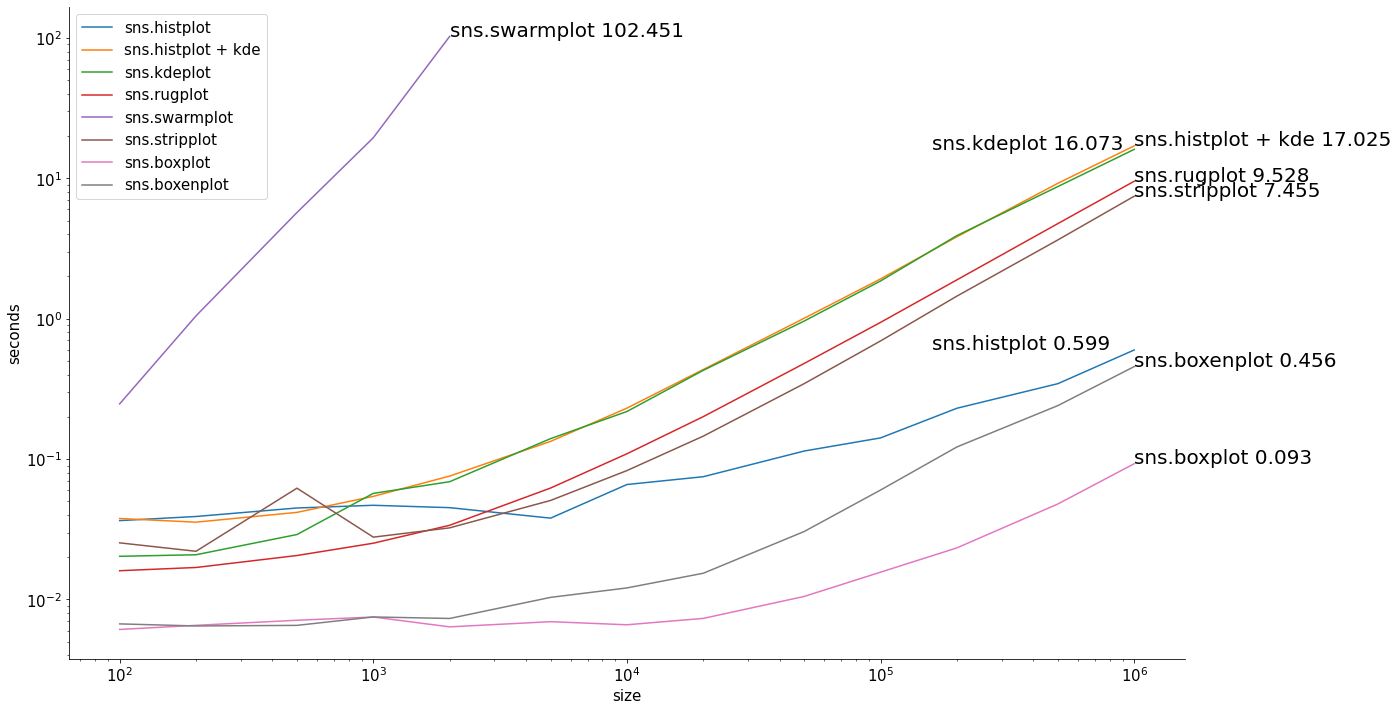

In [16]:
for i, name in enumerate(res):
    plt.plot(sizes[:limits[name]], res[name], label=name)
#     plt.fill_between(sizes[:limits[name]],
#                      np.array(res[name]) + np.array(std[name]),
#                      np.array(res[name]) - np.array(std[name]),
#                      alpha=.5, linewidth=0)
    
    plt.xlabel('size', fontsize=15)
    plt.ylabel('seconds', fontsize=15)
    move_names = ('sns.kdeplot', 'sns.histplot')
    modifier = 0 if name not in move_names else -840000

    plt.annotate(name + f' {round(res[name][-1], 3)}', xy=(sizes[:limits[name]][-1] + modifier, res[name][-1]),
                 fontsize=20)
    
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.gcf().set_size_inches(20, 12)
sns.despine()

plt.show()